<a href="https://colab.research.google.com/github/Sweta-Das/ML-with-Python/blob/main/2_3_Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear regression on 1D

Linear regression on 1D wave dataset

In [ ]:
pip install mglearn

w[0]: 0.393906  b: -0.031804


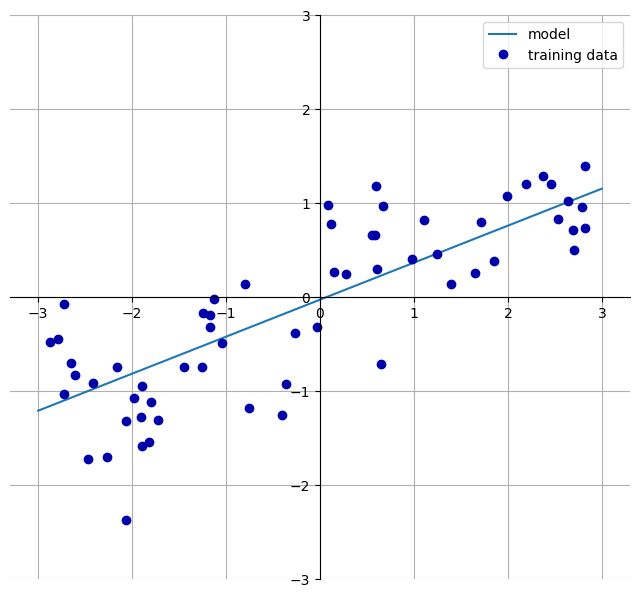

In [ ]:
import mglearn

mglearn.plots.plot_linear_regression_wave()

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples= 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


Slope (w; weights or coeff) parameters are stored in "coef_" attribute.<br/>
Offset or intercept (b) is stored in the "intercept_" attribute.

In [ ]:
# Training & test set performance
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


R^2 of 66% is not very good value. Since, training & test score are very close, this is the case of underfitting. This is also because it's a 1D dataset (simple). <br/>
With many features, linear model has high chance of overfitting.

In [ ]:
# Case of overfitting in linear model with many features
X, y = mglearn.datasets.load_extended_boston()

# Splitting data sets and fitting the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)
lr = LinearRegression().fit(X_train, y_train)

# Training & test set performance
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


The Boston Housing dataset has 506 samples & 105 features. With the score, we understand that this is a case of overfitting.

### Ridge Regression
 a linear model for regression, where the coeff (w) are made very small by the model so that they don't effect on the outcome of prediction. It performs L2 regularization to prevent overfitting.

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


We can see that, though training score is less than Linear Regression but, test score is higher. This is because there's less overfitting of data with ridge regression.

In [ ]:
# Increasing the value of alpha parameter; alpha = 10

ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [ ]:
# Decreasing the value of alpha parameter; alpha = 0.1

ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


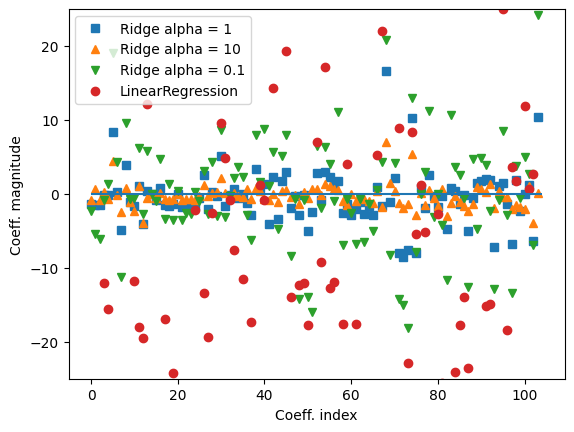

In [ ]:
# Plotting Linear Regression and Ridge regression to get qualitative insight

import matplotlib.pyplot as plt

plt.plot(ridge.coef_, 's', label= "Ridge alpha = 1")
plt.plot(ridge10.coef_, '^', label= "Ridge alpha = 10")
plt.plot(ridge01.coef_, 'v', label= "Ridge alpha = 0.1")

plt.plot(lr.coef_, 'o', label= "LinearRegression")
plt.xlabel("Coeff. index")
plt.ylabel("Coeff. magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

The given fig. shows that higher value of alpha means a more restricted model which is good for generalization.<br/>
Here, <br/>X-axis => coeff. index; coeff associated with each feature (x=0 to x=100)<br/>
Y-axis => coeff. magniture; numeric values of each coeff

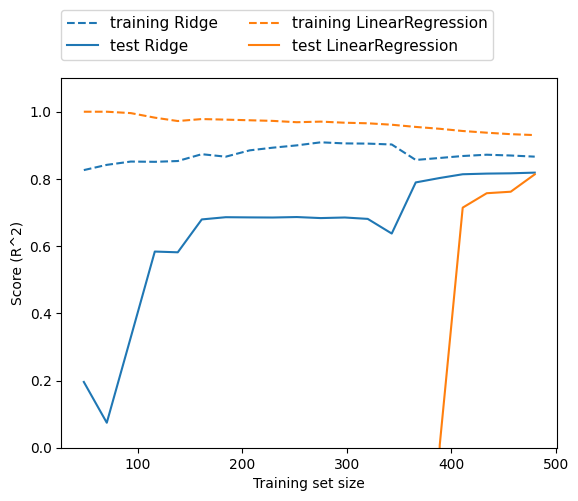

In [ ]:
# Understanding the influence of regularization by fixing alpha & varying the amount of training data

mglearn.plots.plot_ridge_n_samples()

Training score is higher than test score in both Linear reg. & Ridge reg. Because of regularization, training score of ridge reg. is less compared to linear reg., however, the test score is higher.

### Lasso
Similar as ridge regression but, performs L1 regularization (i.e., while restricting the coeff to be close to 0, some coeff. are exactly 0)

In [ ]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Total no. of features: {}".format(np.shape(lasso.coef_)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Total no. of features: (104,)
Number of features used: 4


Lasso performs poorly in training & test set, & shows underfitting this is because out of 105 features, it only used 4 features as it turned them to 0.

In [ ]:
print("Coeff of features in lasso: {}".format(lasso.coef_))

Coeff of features in lasso: [-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -5.3529079  -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.         -1.05063037 -3.3104274  -0.         -0.          0.
 -0.         -0.         -0.          0.         -0.         -

In [ ]:
 # Decreasing the alpha parameter to avoid underfitting; alpha= 0.01, max_iter= 100000

lasso001 = Lasso(alpha= 0.01, max_iter= 100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("No. of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
No. of features used: 33


Better training and test score than ridge reg. with only 33 features.

In [ ]:
# Decreasing the alpha parameter too low, again leads to overfitting

lasso00001 = Lasso(alpha= 0.0001, max_iter= 100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("No. of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
No. of features used: 96


Showing overfitting in lasso with too low value of alpha.

Text(0, 0.5, 'Coeff. magnitude')

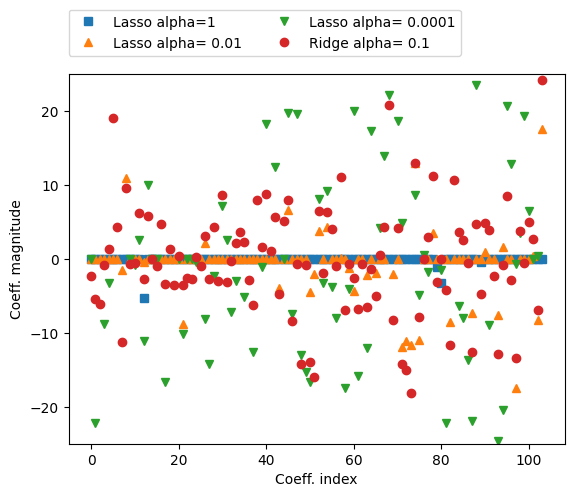

In [ ]:
# Plotting coeff of different models with varying values of alpha

plt.plot(lasso.coef_, 's', label= "Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label= "Lasso alpha= 0.01")
plt.plot(lasso00001.coef_, 'v', label= "Lasso alpha= 0.0001")

plt.plot(ridge01.coef_, 'o', label= "Ridge alpha= 0.1")
plt.legend(ncol= 2, loc= (0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coeff. index")
plt.ylabel("Coeff. magnitude")

From the fig., we can see that ridge reg. (alpha = 0.1) & lasso reg. (alpha = 0.01) has similar predictive performance.

## Linear Models for Classification
2 most common linear classification algos:
- Logistic Regression
- Linear Support Vector Classification (Linear SVC)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


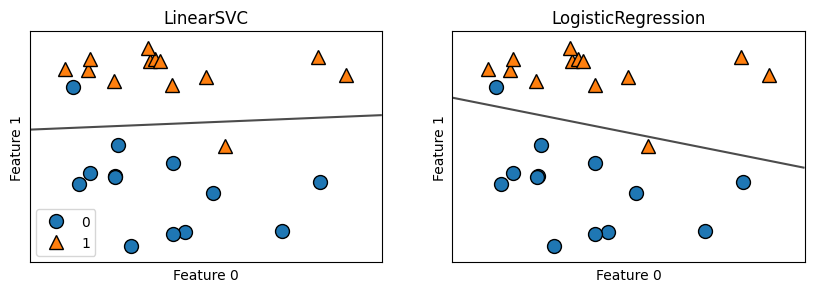

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize= (10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill = False, eps= 0.5, ax= ax, alpha=
                                  .7)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax= ax)
  ax.set_title("{}".format(clf.__class__.__name__))
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")

axes[0].legend()

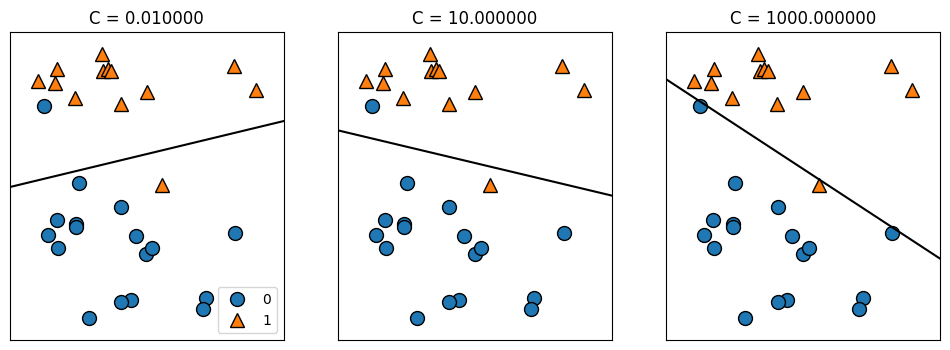

In [ ]:
# Displaying regularization of model with different values of parameter 'C'

mglearn.plots.plot_linear_svc_regularization()

From the fig.,
- Low value of C => High regularization (leftmost fig); 2 mis-classification
- High value of C => Correct classification (rightmost fig)

### Logistic Regression
Analyzing on Breast Cancer dataset.

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify = cancer.target,
                                                    random_state= 42)
logreg = LogisticRegression(max_iter= 10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


stratify parameter splits the dataset in a way that the proportion of sample values will be the same as the proportion provided with this parameter.<br/>
<br/>
Though high, the training & test score are fairly close => Underfitting.

In [ ]:
# Increasing the value of C to avoid underfitting
logreg100 = LogisticRegression(C=100, max_iter= 10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.981
Test set score: 0.965


In [ ]:
# Decreasing the value of C
logreg001 = LogisticRegression(C=0.01, max_iter= 10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


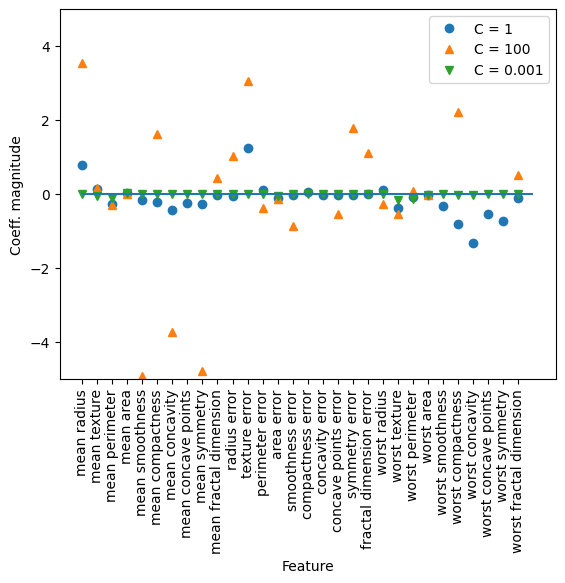

In [ ]:
# Plotting all together
plt.plot(logreg.coef_.T, 'o', label= "C = 1")
plt.plot(logreg100.coef_.T, '^', label= "C = 100")
plt.plot(logreg001.coef_.T, 'v', label= "C = 0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation= 90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coeff. magnitude")
plt.legend()